In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use this for displaying images in Colab

In [2]:
# Load an image
image_path = 'picture.png'  # Replace with your image path
image = cv2.imread(image_path)

# 1.1 Image Resizing
def resize_image(image, width, height, interpolation_method):
    """
    Resize the image using the specified interpolation method.
    """
    if interpolation_method == 'linear':
        interpolation = cv2.INTER_LINEAR
    elif interpolation_method == 'nearest':
        interpolation = cv2.INTER_NEAREST
    elif interpolation_method == 'cubic':
        interpolation = cv2.INTER_CUBIC  # Polynomial interpolation
    else:
        raise ValueError("Invalid interpolation method")

    resized_image = cv2.resize(image, (width, height), interpolation=interpolation)
    return resized_image

Resized Image (Linear Interpolation):


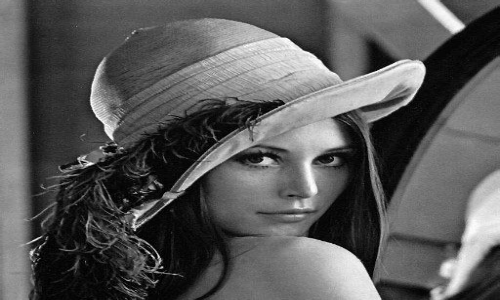

Resized Image (Nearest Neighbor Interpolation):


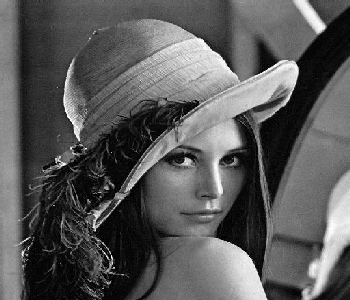

Resized Image (Cubic Interpolation):


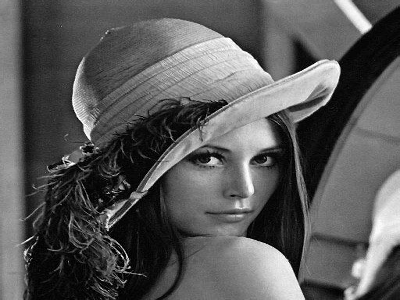

In [3]:
# Resize the image using different interpolation methods
resized_linear = resize_image(image, 500, 300, 'linear')  # Example: Resize to 300x300
resized_nearest = resize_image(image, 350, 300, 'nearest')
resized_cubic = resize_image(image, 400, 300, 'cubic')

# Display resized images
print("Resized Image (Linear Interpolation):")
cv2_imshow(resized_linear)

print("Resized Image (Nearest Neighbor Interpolation):")
cv2_imshow(resized_nearest)

print("Resized Image (Cubic Interpolation):")
cv2_imshow(resized_cubic)


In [4]:
# 1.2 Image Blurring
def blur_image(image, blur_method, kernel_size=(11, 11)):
    """
    Apply blurring to the image using the specified method.
    """
    if blur_method == 'box':
        blurred_image = cv2.blur(image, kernel_size)
    elif blur_method == 'gaussian':
        blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    elif blur_method == 'adaptive':
        # Adaptive blurring can be implemented using bilateral filtering
        blurred_image = cv2.bilateralFilter(image, 9, 75, 75)
    else:
        raise ValueError("Invalid blur method")

    return blurred_image

# Apply different blurring techniques
blurred_box = blur_image(image, 'box')
blurred_gaussian = blur_image(image, 'gaussian')
blurred_adaptive = blur_image(image, 'adaptive')

Blurred Image (Box Blur):


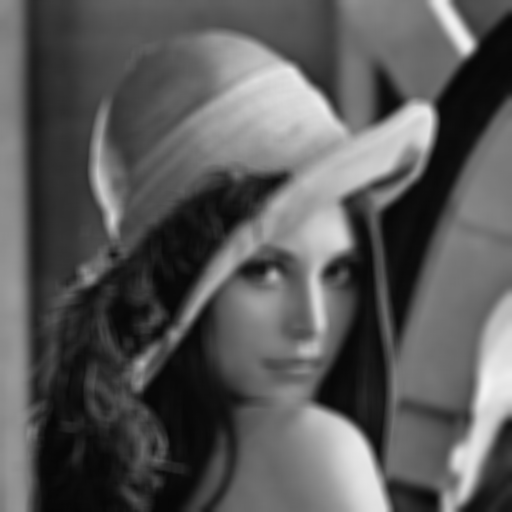

Blurred Image (Gaussian Blur):


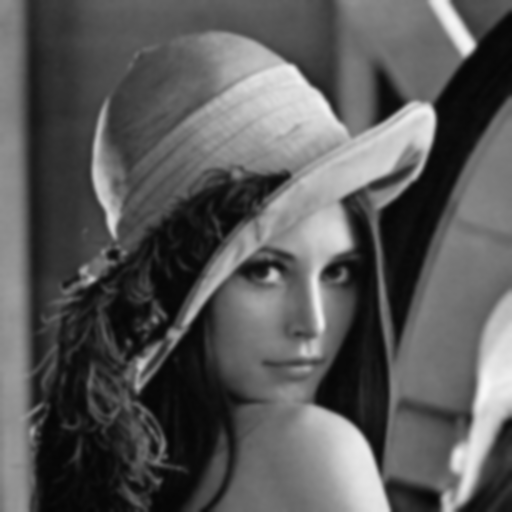

Blurred Image (Adaptive Blur):


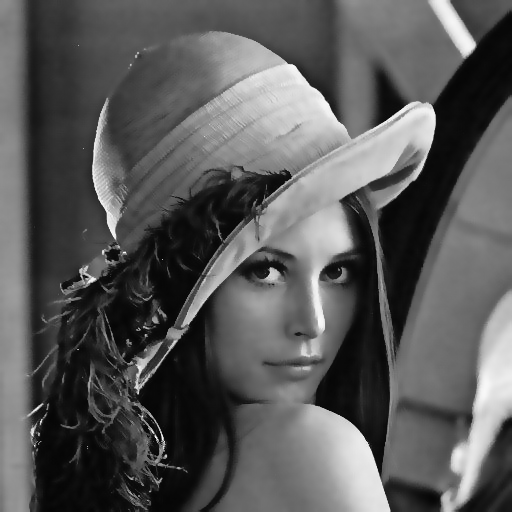

True

In [5]:
# Display blurred images
print("Blurred Image (Box Blur):")
cv2_imshow(blurred_box)

print("Blurred Image (Gaussian Blur):")
cv2_imshow(blurred_gaussian)

print("Blurred Image (Adaptive Blur):")
cv2_imshow(blurred_adaptive)

# Save blurred images
cv2.imwrite('blurred_box.jpg', blurred_box)
cv2.imwrite('blurred_gaussian.jpg', blurred_gaussian)
cv2.imwrite('blurred_adaptive.jpg', blurred_adaptive)

In [10]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    auc
)
import matplotlib.pyplot as plt

In [7]:
# Step 1: Load the digits dataset
print("Loading digits dataset...")
digits = load_digits()
X, y = digits.data, digits.target

# Step 2: Preprocess the data
print("Preprocessing data...")
# Normalize pixel values to [0, 1]
X = X / 16.0  # Since pixel values range from 0 to 16

# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the models
models = {
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


Loading digits dataset...
Preprocessing data...



Evaluating SVM...
Cross-validation accuracy: 0.9868 (±0.0071)

Test set metrics:
Accuracy: 0.9861
Precision: 0.9872
Recall: 0.9866
F1-score: 0.9868

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]


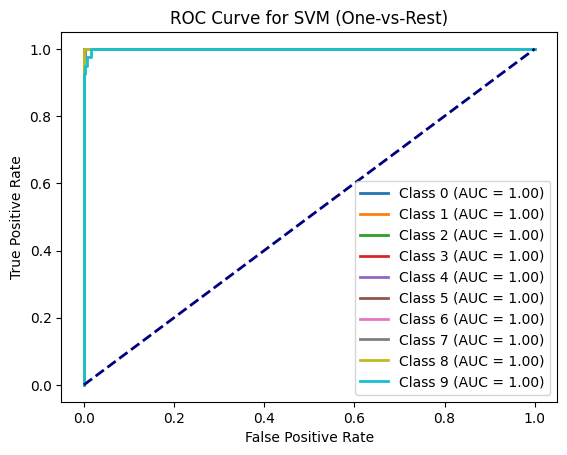


Evaluating Random Forest...
Cross-validation accuracy: 0.9729 (±0.0092)

Test set metrics:
Accuracy: 0.9722
Precision: 0.9740
Recall: 0.9727
F1-score: 0.9732

Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


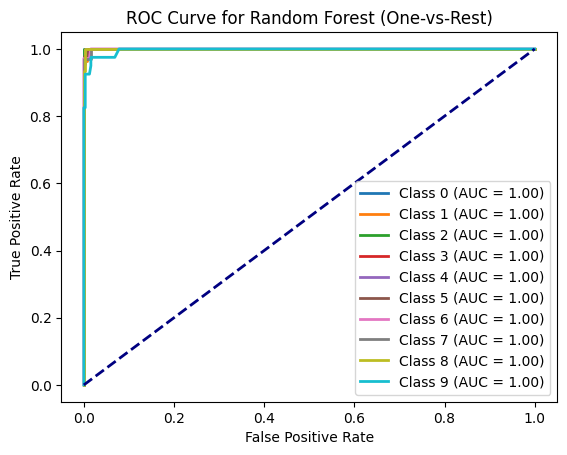

In [12]:
# Step 4: Train and evaluate models using K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\nEvaluating {name}...")

    # K-fold cross-validation for accuracy
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"Cross-validation accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

    # Train the model on the full training set
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Step 5: Compute metrics
    print("\nTest set metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # ROC Curve and AUC (for binary classification, we use One-vs-Rest approach)
    n_classes = len(np.unique(y))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_proba[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC Curve for each class
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name} (One-vs-Rest)')
    plt.legend(loc="lower right")
    plt.show()